<h3> Lending club Case study </h3>
Project Description: 

Primary goal of this project is to identify the factors responsible for loan defaults with the help of datasets provided. This will enable the company to refine loan approval processes by implementing stricter criteria for high-risk applicants, potentially leading to loan denials or adjustments and improve risk assessment models by developoing more accurate predictive models to better assess the creditworthiness of applicants.


Method used:

1. Data Exploration and Cleaning: 
    1.1 - Check the missing values
    1.2 - Handle missing values through imputation or data removal
    1.3 - Check for data types and convert if required

2. Exploratory Data Analysis
    2.1 - Target Variable Analysis
    2.2 - Univariate Analysis to check the distributions of numerical and categorical variables.
    2.3 - Bivariate Analysis to establish the relationship between relevant variables and the target variable.
    2.4 - Correlation Analysis to calculate and visualizes the correlation matrix for selected numerical variables.

3. Data Visualization: Utilizes different plots to visualize data distributions and relationships.

4. Data insight and conclusion:

    4.1 - Based on the Exploratory Data Analysis, analyze the variables which are strongly associated with loan defalt
    4.2 - Is there any significant differneces between defaulters and non-defaulters
    4.3 - Key risk factors that company should consider

In [18]:
# Import requireed python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read data from CSV file. Python file and CSV file needs to be in the same location
df = pd.read_csv('loan.csv',low_memory=False)
#Check how many null values are present in each column
df.isnull().sum()
# dropping columns with complete null values.More than 50 columns have complete null values.
df.dropna(axis=1, how='all', inplace=True)

# Drop columns where all values are zeros
df = df.loc[:, (df != 0).any(axis=0)]

df['application_type'].value_counts()
# drop application_type column as it has no significance
df.drop('application_type',axis=1,inplace=True)
df['pymnt_plan'].value_counts()
# drop pymnt_plan column as it has no significance - it has only value n
df.drop('pymnt_plan',axis=1,inplace=True)
# dropping columns with less significance. Columns that do not contin meaningful values or only one type of values
df.drop('url',axis=1,inplace=True)
df.drop('desc',axis=1,inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)
df.drop('tax_liens',axis=1,inplace=True)
df.drop('policy_code',axis=1,inplace=True)
df.drop('chargeoff_within_12_mths',axis=1,inplace=True)


In [19]:
# clean the data- convert the object to floating point by removing %
def Convert_percent_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%'))

df['revol_util'] = df['revol_util'].apply(Convert_percent_to_float)

# Emp_lenght is not in right format , remove unnecessary characters like < , year , years
df['emp_length'] = df['emp_length'].str.replace(r'\+|\s*years?', '', regex=True).str.replace(r'<', '', regex=True)
# impute the missing value with 0, number of missing values are less than 5 % , so it makes no big difference
emp_missing=0
df['emp_length'].fillna(emp_missing)
df['emp_length'] = df['emp_length'].astype(float)
df['emp_length'].isnull().sum()

# 2. Handle Missing Values in DTI
# Calculate the median of the 'dti' column
dti_median = df['dti'].median()
df['dti'].fillna(dti_median)

#convert int_rate from percentage to float for analysis

def Convert_int_rate_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%')) / 100

df['int_rate'] = df['int_rate'].apply(Convert_int_rate_to_float)

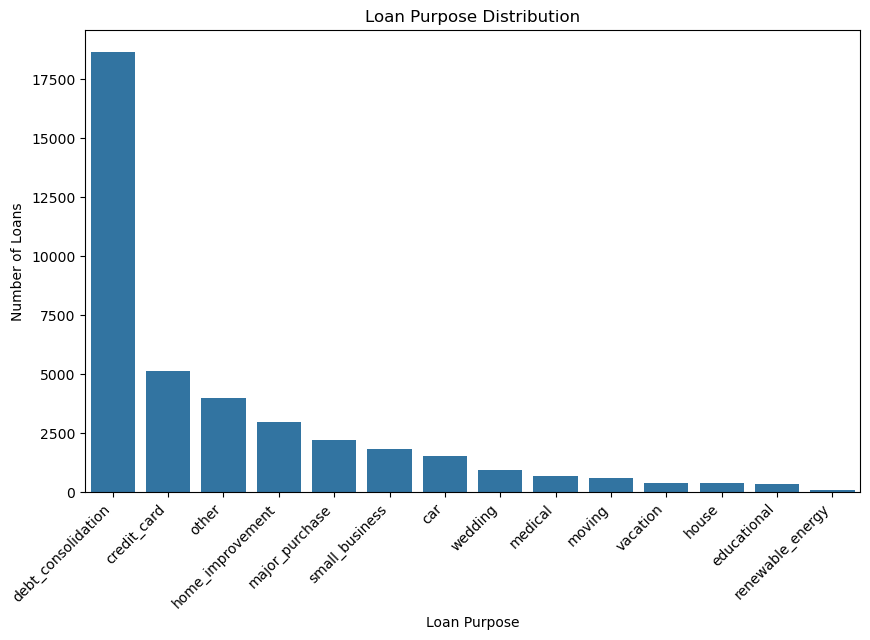

In [20]:
#univariate analysis 

#Loan Purpose Distribution

# Calculate the frequency distribution of loan purposes
purpose_counts = df['purpose'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()


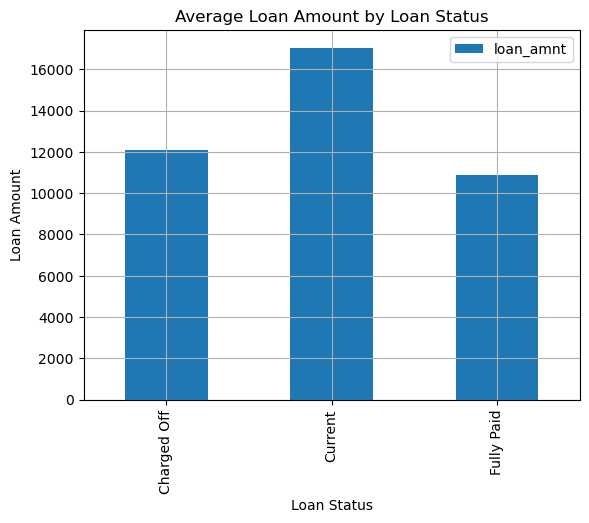

In [21]:
# create a pivot table to get average loan amount for loan_status
pivot_table1 = df.pivot_table(values='loan_amnt', index='loan_status',  aggfunc='mean')
pivot_table1.plot(kind='bar',grid=True)
plt.title('Average Loan Amount by Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()



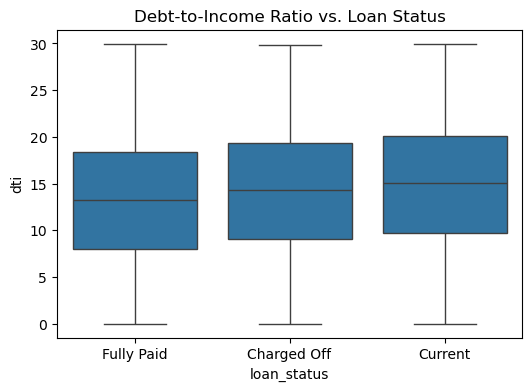

In [22]:
# 2.3 Bivariate Analysis
# 2.3.1 Numerical vs. Categorical
plt.figure(figsize=(6, 4))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title("Debt-to-Income Ratio vs. Loan Status")
plt.show()

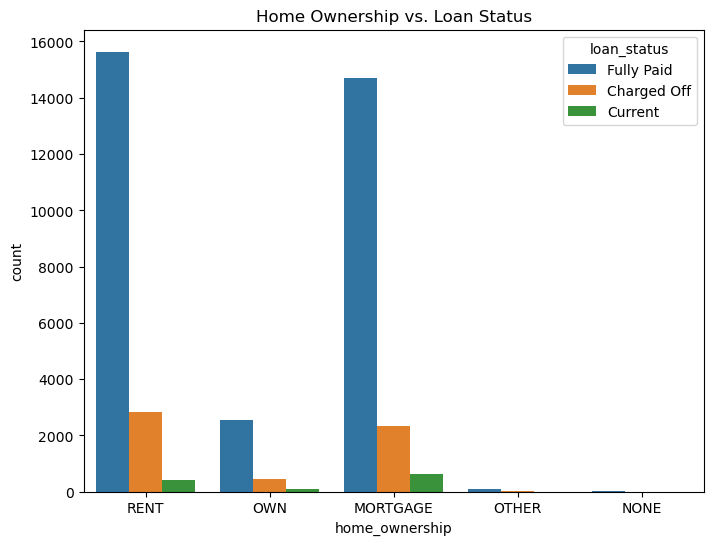

In [23]:
# 2.3.2 Categorical vs. Categorical
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title("Home Ownership vs. Loan Status")
plt.show()

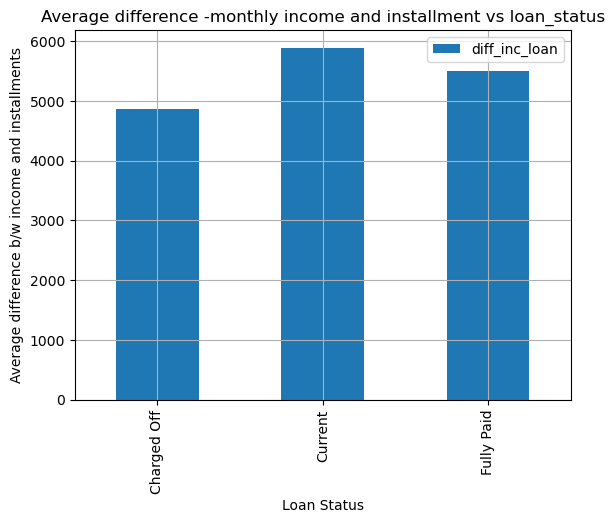

In [24]:

# Probability default based on monthly income vs monthly installments for loan
df['diff_inc_loan']=(df['annual_inc']/12)-df['installment']
pivot_instalmnt_status = df.pivot_table(values='diff_inc_loan', index='loan_status',  aggfunc='mean')
pivot_instalmnt_status.plot(kind='bar',grid=True)
plt.title('Average difference -monthly income and installment vs loan_status')
plt.ylabel('Average difference b/w income and installments')
plt.xlabel('Loan Status')
plt.show()

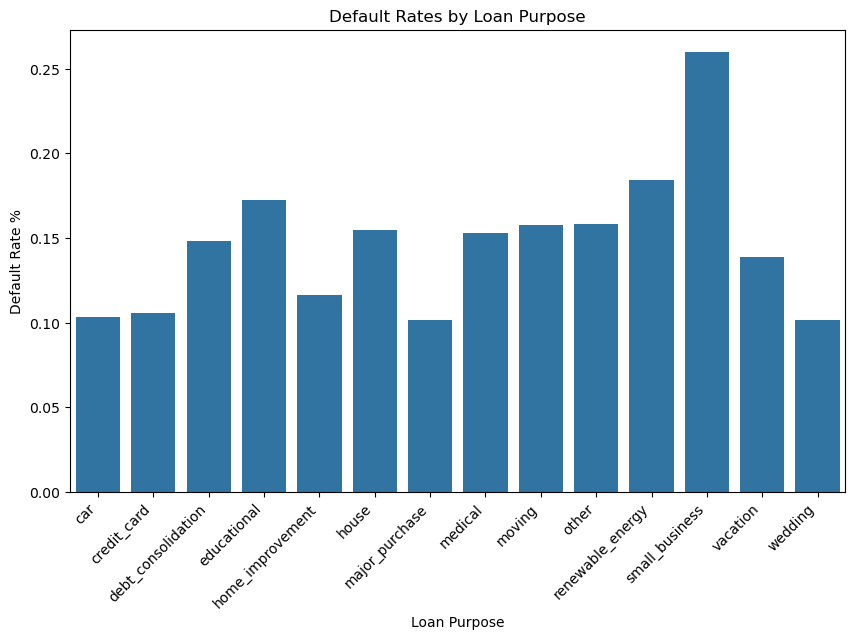

In [25]:
# purpose of loan vs defauls
default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()).reset_index(name='default_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default_rate', data=default_rates)
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate %')
plt.xticks(rotation=45, ha='right')
plt.show()

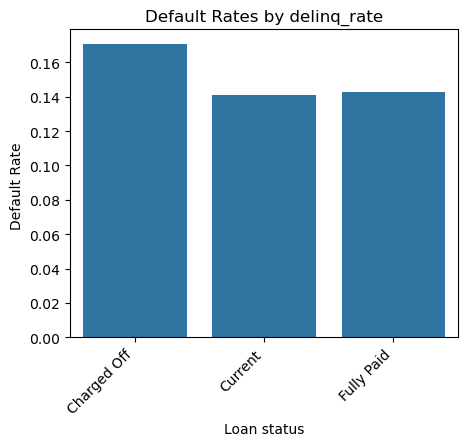

In [26]:
# delinq_2yrs based analysis , if there are more number of deferred payments, more chances of defaults
delinq_data = df.groupby('loan_status')['delinq_2yrs'].mean().reset_index(name='default_rate')
plt.figure(figsize=(5, 4))
sns.barplot(x='loan_status', y='default_rate', data=delinq_data)
plt.title('Default Rates by delinq_rate')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()

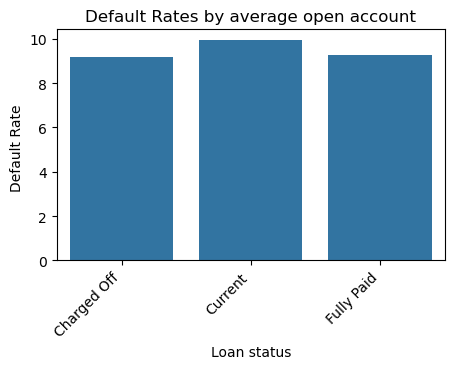

In [27]:
# open account based analysis , if there are more number of open accounts, more chances of defaults
open_acc_data = df.groupby('loan_status')['open_acc'].mean().reset_index(name='open_acc_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='open_acc_avg', data=open_acc_data)
plt.title('Default Rates by average open account')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()


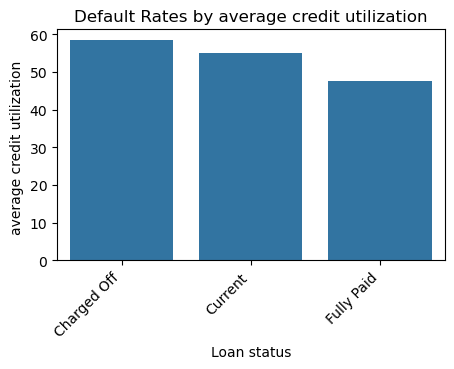

   loan_status  revol_util_avg
0  Charged Off           58.40
1      Current           54.95
2   Fully Paid           47.60


In [28]:
# Analysis based on revolving credit utilization
revol_util_data = df.groupby('loan_status')['revol_util'].median().reset_index(name='revol_util_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='revol_util_avg', data=revol_util_data)
plt.title('Default Rates by average credit utilization')
plt.xlabel('Loan status')
plt.ylabel('average credit utilization ')
plt.xticks(rotation=45, ha='right')
plt.show()
print(revol_util_data)



<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


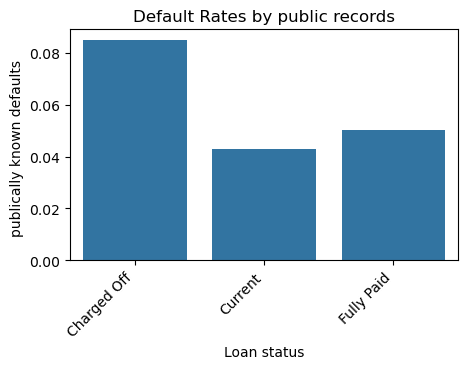

In [29]:
# Analysis of public data

df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'].info()

df['pub_rec'].describe()

pub_rec_data = df.groupby('loan_status')['pub_rec'].mean().reset_index(name='pub_data')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='pub_data', data=pub_rec_data)
plt.title('Default Rates by public records')
plt.xlabel('Loan status')
plt.ylabel('publically known defaults ')
plt.xticks(rotation=45, ha='right')
plt.show()



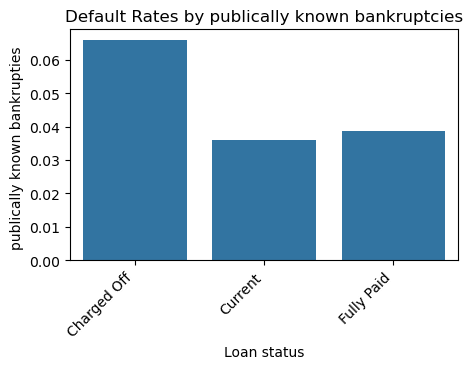

In [30]:
pub_bankrupt_data = df.groupby('loan_status')['pub_rec_bankruptcies'].mean().reset_index(name='pub_rec_bankrupt')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='pub_rec_bankrupt', data=pub_bankrupt_data)
plt.title('Default Rates by publically known bankruptcies')
plt.xlabel('Loan status')
plt.ylabel('publically known bankrupties ')
plt.xticks(rotation=45, ha='right')
plt.show()

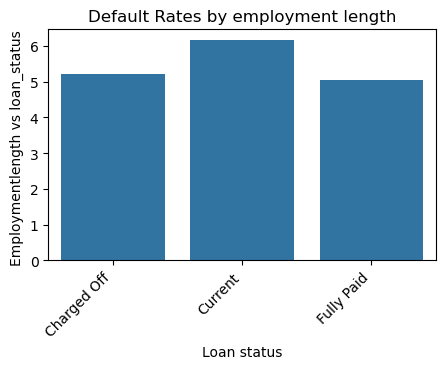

In [31]:

emp_length_data = df.groupby('loan_status')['emp_length'].mean().reset_index(name='employment_length')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='employment_length', data=emp_length_data)
plt.title('Default Rates by employment length')
plt.xlabel('Loan status')
plt.ylabel('Employmentlength vs loan_status ')
plt.xticks(rotation=45, ha='right')
plt.show()



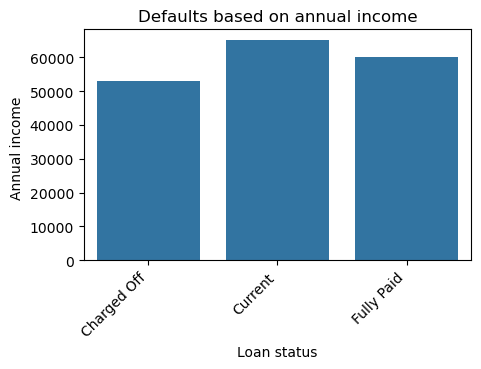

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [32]:
# annual income vs charged off


annual_income_data = df.groupby('loan_status')['annual_inc'].median().reset_index(name='avg_income')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='avg_income', data=annual_income_data)
plt.title('Defaults based on annual income')
plt.xlabel('Loan status')
plt.ylabel('Annual income ')
plt.xticks(rotation=45, ha='right')
plt.show()
df['annual_inc'].describe()

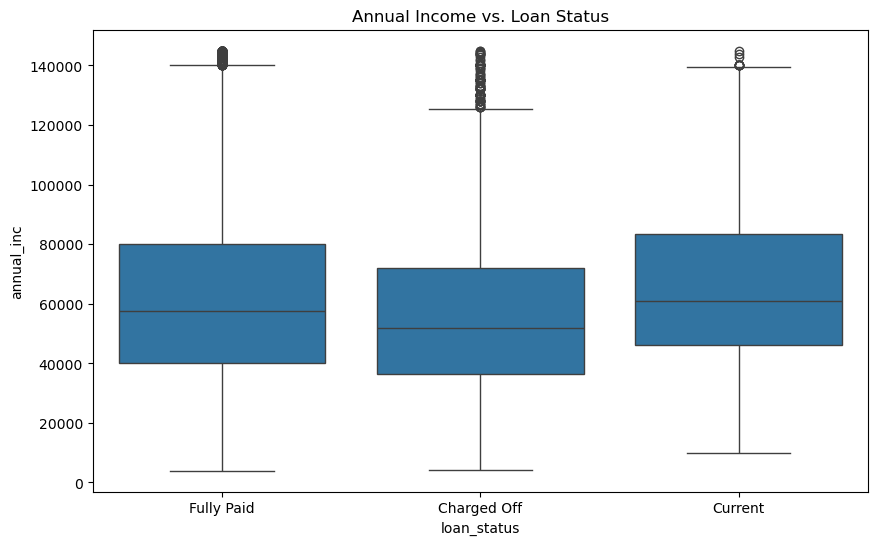

In [33]:
# 2.2 Univariate Analysis

# Remove outliers
# Method 1: Using IQR (Interquartile Range)
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_no_outliers_iqr = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df_no_outliers_iqr)
plt.title("Annual Income vs. Loan Status")
plt.show()


#Interpretation of Box Plots:

#Medians: The medians of annual_inc are roughly similar across all three loan statuses. This suggests that the typical income of borrowers who fully
#paid, charged off, or are currently paying is not drastically different.

#Interquartile Ranges (IQRs): The boxes are also of comparable height, indicating that the spread or variability of incomes within the middle 50% 
#of the data is similar across the groups.

#Whiskers: The whiskers extend to roughly similar levels for "Fully Paid" and "Current," but the "Charged Off" group appears to have slightly 
#shorter whiskers at the top.

#Outliers: This is the most noticeable difference. All three groups have outliers (points above the top whisker), indicating some borrowers with 
#very high incomes. However, the "Charged Off" group appears to have fewer and less extreme outliers compared to the other two groups.

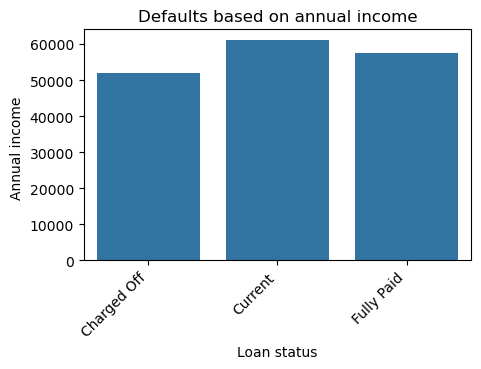

In [34]:
annual_income_data = df_no_outliers_iqr.groupby('loan_status')['annual_inc'].median().reset_index(name='avg_income')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='avg_income', data=annual_income_data)
plt.title('Defaults based on annual income')
plt.xlabel('Loan status')
plt.ylabel('Annual income ')
plt.xticks(rotation=45, ha='right')
plt.show()


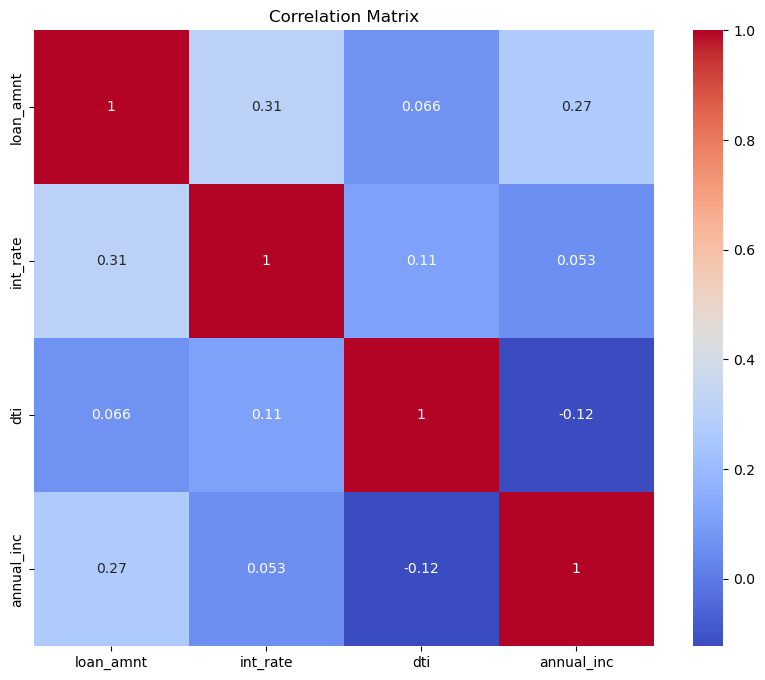

In [35]:
# 2.4 Correlation Analysis
correlation_matrix = df[['loan_amnt', 'int_rate', 'dti', 'annual_inc']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


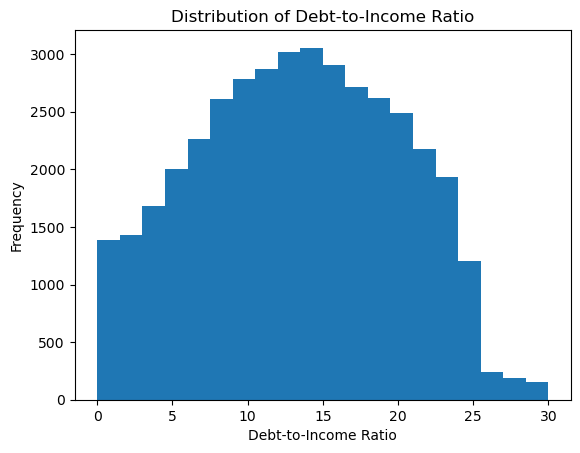

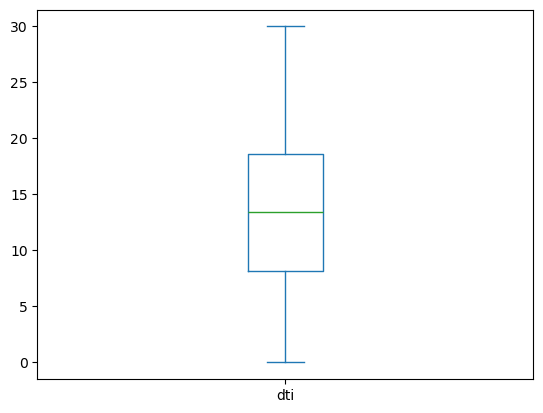

In [36]:
#Analyses with DTI:

# Examining the distribution of DTI using histograms and box plots. This helps understand the typical DTI values in our dataset and identify outliers.

#Summary Statistics: Calculating mean, median, standard deviation, quartiles, and range of DTI. This provides a concise summary of the data.

print(df['dti'].describe())
plt.hist(df['dti'], bins=20)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()
df['dti'].plot(kind='box')
plt.show()

In [37]:
# extract data for analysing the loan status based on grade
category_data = df.groupby(['grade','loan_status'])['member_id'].count().reset_index(name='count_grade')
category_data_fltred = category_data[~(category_data['loan_status'] =='Current') ]


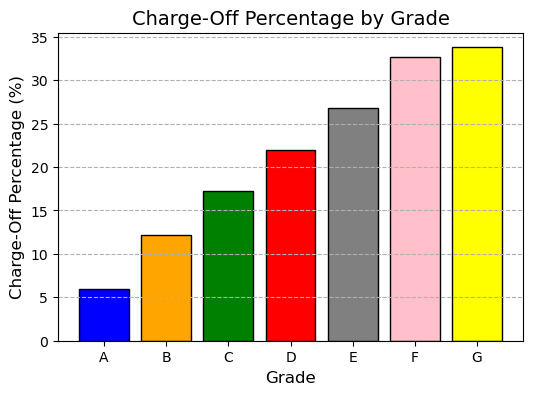

In [38]:
# Pivot the table to get Charged Off and Fully Paid counts side by side
pivot = category_data_fltred.pivot(index="grade", columns="loan_status", values="count_grade")

# Calculate charge-off percentage
pivot["Charge Off %"] = (pivot["Charged Off"] / (pivot["Charged Off"] + pivot["Fully Paid"])) * 100

# Plot the charge-off percentage
plt.figure(figsize=(6, 4))
plt.bar(pivot.index, pivot["Charge Off %"], color=['blue','orange','green','red','grey','pink','yellow'], edgecolor='black')
plt.title("Charge-Off Percentage by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Charge-Off Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

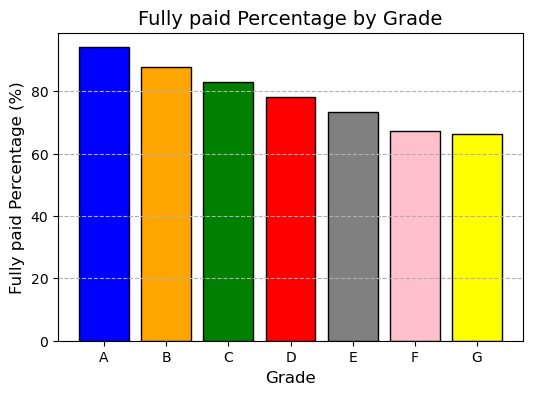

In [39]:
pivot["Fully paid %"] = (pivot['Fully Paid'] / (pivot["Charged Off"] + pivot["Fully Paid"])) * 100
# Plot the charge-off percentage
plt.figure(figsize=(6, 4))
plt.bar(pivot.index, pivot["Fully paid %"], color=['blue','orange','green','red','grey','pink','yellow'], edgecolor='black')
plt.title("Fully paid Percentage by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Fully paid Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()